<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 6: Classification Algorithms

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Part 1: Classification

So far, every supervised learning algorithm that we've seen has been an instance of regression.

Next, let's look at some classification algorithms. First, we will define what classification is.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

# Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.

2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a *binary classification* problem.

# Classification Dataset: Iris Flowers

To demonstrate classification algorithms, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Here is a visualization of this dataset in 3D. Note that we are using the first 3 features (out of 4) in this dateset.

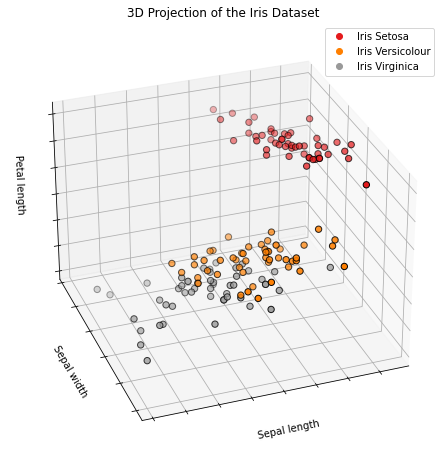

In [3]:
# Code from: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# let's visualize this dataset

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(iris_X)
X_reduced = iris_X.to_numpy()[:,:3]
ax.set_title("3D Projection of the Iris Dataset")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.w_zaxis.set_ticklabels([])
p1 = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris_y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

# Understanding Classification

How is clasification different from regression?
* In regression, we try to fit a curve through the set of targets $y^{(i)}$.

* In classification, classes define a partition of the feature space, and our goal is to find the boundaries that separate these regions.

* Outputs of classification models have a simple probabilistic interpretation: they are probabilities that a data point belongs to a given class.

Let's visualize our Iris dataset to see this. Note that we are using the first 2 features in this dateset.

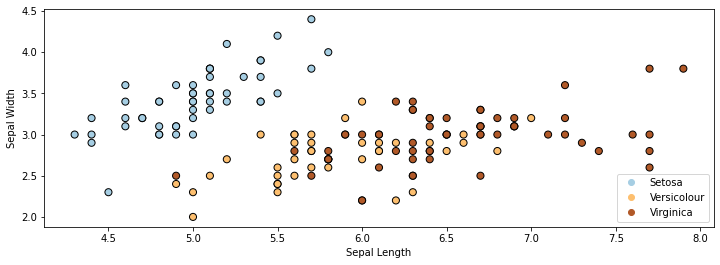

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

Let's train a classification algorithm on this data.

Below, we see the regions predicted to be associated with the blue and non-blue classes and the line between them in the decision boundary.

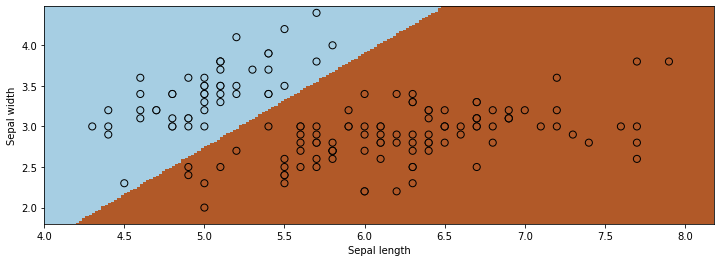

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
# rename class two to class one
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
Y = iris_y2
logreg.fit(X, Y) 

xx, yy = np.meshgrid(np.arange(4, 8.2, .02), np.arange(1.8, 4.5, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Nearest Neighbors

Previously, we have seen what defines a classification problem. Let's now look at our first classification algorithm.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# A Simple Classification Algorithm: Nearest Neighbors

Suppose we are given a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. At inference time, we receive a query point $x'$ and we want to predict its label $y'$.

A really simple but suprisingly effective way of returning $y'$ is the *nearest neighbors* approach.
* Given a query datapoint $x'$, find the training example $(x, y)$ in $\mathcal{D}$ that's closest to $x'$, in the sense that $x$ is "nearest" to $x'$
* Return $y$, the label of the "nearest neighbor" $x$.

In the example below on the Iris dataset, the red cross denotes the query $x'$. The closest class to it is "Virginica". (We're only using the first two features in the dataset for simplicity.)

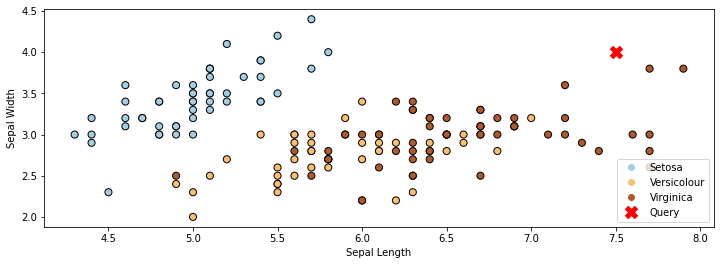

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
p2 = plt.plot([7.5], [4], 'rx', ms=10, mew=5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['Query Point', 'Training Data'], loc='lower right')
plt.legend(handles=p1.legend_elements()[0]+p2, labels=['Setosa', 'Versicolour', 'Virginica', 'Query'], loc='lower right')

# Choosing a Distance Function

How do we select the point $x$ that is the closest to the query point $x'$? There are many options:

* The Euclidean distance $|| x - x' ||_2 = \sqrt{\sum_{j=1}^d |x_j - x'_j|^2)}$ is a popular choice.

* The Minkowski distance $|| x - x' ||_p = (\sum_{j=1}^d |x_j - x'_j|^p)^{1/p}$ generalizes the Euclidean, L1 and other distances.

* The Mahalanobis distance $\sqrt{x^\top V x}$ for a positive semidefinite matrix $V \in \mathbb{R}^{d \times d}$ also generalizes the Euclidean distnace.

* Discrete-valued inputs can be examined via the Hamming distance $|\{j : x_j \neq x_j'\}|$ and other distances.

Let's apply Nearest Neighbors to the above dataset using the Euclidean distance (or equiavalently, Minkowski with $p=2$)

Text(0, 0.5, 'Sepal Width')

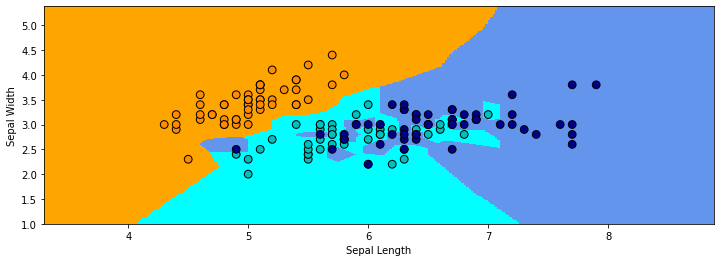

In [23]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from sklearn import neighbors
from matplotlib.colors import ListedColormap

# Train a Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
clf.fit(iris_X.iloc[:,:2], iris_y)

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = iris_X.iloc[:, 0].min() - 1, iris_X.iloc[:, 0].max() + 1
y_min, y_max = iris_X.iloc[:, 1].min() - 1, iris_X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y, cmap=cmap_bold,
            edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In the above example, the regions of the 2D space that are assigned to each class are highly irregular. In areas where the two classes overlap, the decision of the boundary flips between the classes, depending on which point is closest to it.

# K-Nearest Neighbors

Intuitively, we expect the true decision boundary to be smooth. Therefore, we average $K$ nearest neighbors at a query point.

* Given a query datapoint $x'$, find the $K$ training examples $\mathcal{N} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(K)}, y^{(K)})\} \subseteq D$ that are closest to $x'$.
* Return $y_\mathcal{N}$, the consensus label of the neighborhood $\mathcal{N}$.

The consesus $y_\mathcal{N}$ can be determined by voting, weighted average, etc.

Let's look at Nearest Neighbors with a neighborhood of 30. The decision boundary is much smoother than before.

Text(0, 0.5, 'Sepal Width')

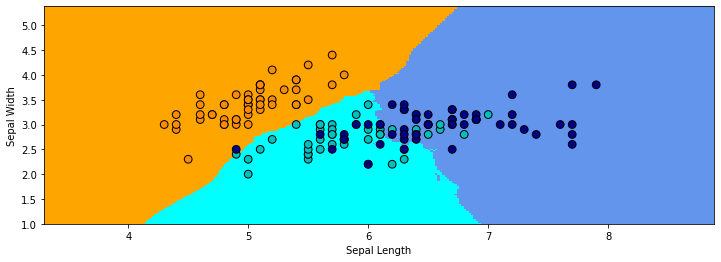

In [8]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Train a Nearest Neighbors Model
clf = neighbors.KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
clf.fit(iris_X.iloc[:,:2], iris_y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y, cmap=cmap_bold,
            edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Review: Data Distribution

We will assume that the dataset is governed by a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$ x, y \sim \mathbb{P}. $$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $\mathbb{P}$.

# KNN Estimates Data Distribution

Suppose that the output $y'$ of KNN is the average target in the neighborhood $\mathcal{N}(x')$ around the query $x'$.
Observe that we can write:
$$y' = \frac{1}{K} \sum_{(x, y) \in \mathcal{N}(x')} y \approx \mathbb{E}[y \mid x'].$$

* When $x \approx x'$ and when $\mathbb{P}$ is reasonably smooth, each $y$ for $(x,y) \in \mathcal{N}(x')$ is approximately a sample from $\mathbb{P}(y\mid x')$ (since $\mathbb{P}$ doesn't change much around $x'$, $\mathbb{P}(y\mid x') \approx \mathbb{P}(y\mid x)$).

* Thus $y'$ is essentially a Monte Carlo estimate of $\mathbb{E}[y \mid x']$ (the average of $K$ samples from $\mathbb{P}(y\mid x')$).

# Algorithm: K-Nearest Neighbors

* __Type__: Supervised learning (regression and classification)
* __Model family__: Consensus over $K$ training instances.
* __Objective function__: Euclidean, Minkowski, Hamming, etc.
* __Optimizer__: Non at training. Nearest neighbor search at inference using specialized search algorithms (Hashing, KD-trees).
* __Probabilistic interpretation__: Directly approximating the density $P_\text{data}(y|x)$.

# Pros and Cons of KNN

Pros:
* Can approximate any data distribution arbtrarily well.

Cons:
* Need to store entire dataset to make queries, which is computationally prohibitive.
* Number of data needed scale exponentially with dimension ("curse of dimensionality").

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Non-Parametric Models

Nearest neighbors is the first example of an important type of machine learning algorithm called a non-parametric model.

# Review: Supervised Learning Model

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
to denote that it's parametrized by $\theta$.

# Review: K-Nearest Neighbors

Suppose we are given a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. At inference time, we receive a query point $x'$ and we want to predict its label $y'$.

* Given a query datapoint $x'$, find the $K$ training examples $\mathcal{N} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(K)}, y^{(K)})\} \subseteq D$ that are closest to $x'$.
* Return $y_\mathcal{N}$, the consensus label of the neighborhood $\mathcal{N}$.

The consesus $y_\mathcal{N}$ can be determined by voting, weighted average, etc.

# Non-Parametric Models

Nearest neighbors is an example of a *non-parametric* model. Parametric vs. non-parametric are is a key distinguishing characteristic for machine learning models.

A parametric model $f_\theta(x) : \mathcal{X} \times \Theta \to \mathcal{Y}$ is defined by a finite set of parameters $\theta \in \Theta$ whose dimensionality is constant with respect to the dataset. Linear models of the form
$$ f_\theta(x) = \theta^\top x $$
are an example of a parametric model.

In a non-parametric model, the function $f$ uses the entire training dataset (or a post-proccessed version of it) to make predictions, as in $K$-Nearest Neighbors. In other words, the complexity of the model increases with dataset size.

Non-parametric models have the advantage of not loosing any information at training time. However, they are also computationally less tractable and may easily overfit the training set.

# Algorithm: K-Nearest Neighbors

* __Type__: Supervised learning (regression and classification)
* __Model family__: *Non-parametric*: Consensus over $K$ training instances.
* __Objective function__: Euclidean, Minkowski, Hamming, etc.
* __Optimizer__: None at training. Nearest neighbor search at inference using specialized search algorithms (Hashing, KD-trees).
* __Probabilistic interpretation__: Directly approximating the density $P_\text{data}(y|x)$.

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 4: Logistic Regression

Next, we are going to see a simple parametric classification algorithm that addresses many of these limitations of Nearest Neighbors.

# Review: Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification and the Iris Dataset

We are going to start by looking at binary (two-class) classification. 

To keep things simple, we will use the Iris dataset. We will be predicting the difference between class 0 (Iris Setosa) and the other two classes.

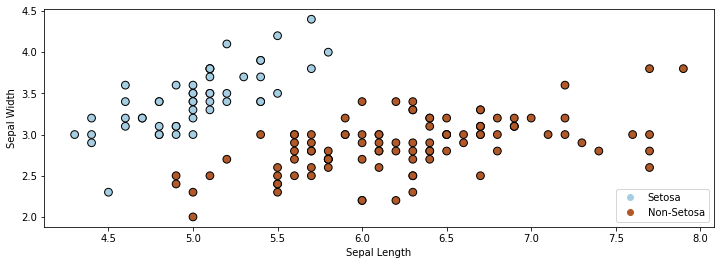

In [9]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

# rename class two to class one
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y2,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

# Review: Least Squares

Recall that the linear regression algorithm fits a linear model of the form
$$ f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

It minimizes the mean squared error (MSE)
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
on a dataset $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We could also use the above model for classification problem for which $\mathcal{Y} = \{0, 1\}$.

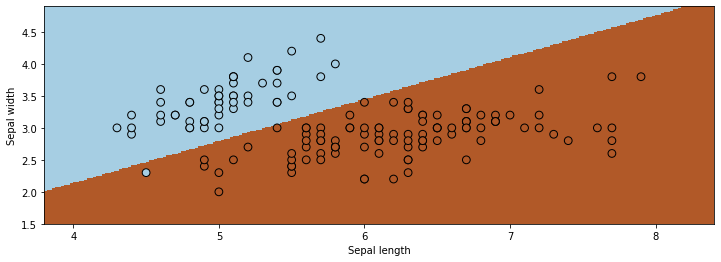

In [10]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html   
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
Y = iris_y2
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z>0.5] = 1
Z[Z<0.5] = 0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=60)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

Least squares returns an acceptable decision boundary on this dataset. However, it is problematic for a few reasons.
* There is nothing to prevent outputs larger than one or smaller than zero, which is conceptually wrong
* We also don't have optimal performance: at least one point is misclassified, and others are too close to the decision boundary.

# The Logistic Function

To address this problem, we will look at a different hypothesis class. We will choose models of the form:
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" points from the real line into $[0,1]$.

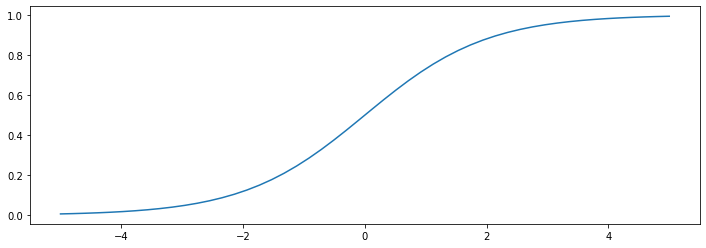

In [11]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-5, 5)
plt.plot(z, sigmoid(z))

# The Logistic Function: Properties

The sigmoid function is defined as
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
A few observations:

* The tends to 1 as $z \to \infty$ and tends to 0 as $z \to -\infty$.

* Thus, models of the form $\sigma(\theta^\top x)$ output values between 0 and 1, which is suitable for binary classification.

* It is easy to show that the derivative of $\sigma(z)$ has a simple form:
$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)).$

Let's implement our model using the sigmoid function.

In [12]:
def f(X, theta):
    """The sigmoid model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

# Review: Probabilistic Least Squares

Recall that least squares can be interpreted as fitting a Gaussian probabilistic model
$$ p(y | x; \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$

The log-likelihood of this model at a point $(x,y)$ equals
\begin{align*}
\log L(\theta) = \log p(y | x; \theta) = \text{const}_1 \cdot (y - \theta^\top x)^2 + \text{const}_2
\end{align*}
for some constants $\text{const}_1, \text{const}_2$.

Least squares thus amounts to fitting a Gaussian $\mathcal{N}(y; \mu(x), \sigma)$ with a standard deviation $\sigma$ of one and a mean of $\mu(x) = \theta^\top x$.

# A Probabilistic Approach to Classification

We can take this probabilistic perspective to derive a new algorithm for binary classification.

We will start by using our logistic model to parametrize a probability distribution as follows:
\begin{align*}
p(y=1 | x;\theta) & = \sigma(\theta^\top x) \\
p(y=0 | x;\theta) & = 1-\sigma(\theta^\top x).
\end{align*}
A probability over $y\in \{0,1\}$ of the form $P(y=1) = p$ is called Bernoulli.

Note that we can write this more compactly as
\begin{align*}
p(y | x;\theta) = \sigma(\theta^\top x)^y \cdot (1-\sigma(\theta^\top x))^{1-y}
\end{align*}

# Review: Conditional Maximum Likelihood

A general approach of optimizing conditional models of the form $P_\theta(y|x)$ is by minimizing expected KL divergence with respect to the data distribution:
$$ \min_\theta \mathbb{E}_{x \sim \mathbb{P}_\text{data}} \left[ D(P_\text{data}(y|x) \mid\mid P_\theta(y|x)) \right]. $$

With a bit of math, we can show that the maximum likelihood objective becomes
$$ \max_\theta \mathbb{E}_{x, y \sim \mathbb{P}_\text{data}} \log P_\theta(y|x). $$
This is the principle of *conditional maximum likelihood*.

# Applying Maximum Lilkelihood

Following the principle of maximum likelihood, we want to optimize the following objective defined over a training dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n p(y^{(i)} \mid x^{(i)} ; \theta) \\
& = \prod_{i=1}^n \sigma(\theta^\top x^{(i)})^{y^{(i)}} \cdot (1-\sigma(\theta^\top x^{(i)}))^{1-y^{(i)}}.
\end{align*}

This log of this objective is also often called the log-loss, or cross-entropy.

This model and objective function define *logistic regression*, one of the most widely used classification algorithms (the name "regression" is an unfortunate misnomer!).

Let's implement the likelihood objective.

In [13]:
def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

# Review: Gradient Descent
If we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

# Derivatives of the Log-Likelihood

Let's work out the gradient for our log likelihood objective:

\begin{align*}
& \frac{\partial \log L(\theta)}{\partial \theta_j} = 
\frac{\partial}{\partial \theta_j} \log \left( \sigma(\theta^\top x) \cdot (1-\sigma(\theta^\top x))^{1-y} \right) \\
& = \left( y\cdot \frac{1}{\sigma(\theta^\top x)} - (1-y) \frac{1}{1-\sigma(\theta^\top x)} \right)  \frac{\partial}{\partial \theta_j} \sigma(\theta^\top x) \\
& = \left( y\cdot \frac{1}{\sigma(\theta^\top x)} - (1-y) \frac{1}{1-\sigma(\theta^\top x)} \right)  \sigma(\theta^\top x) (1-\sigma(\theta^\top x)) \frac{\partial}{\partial \theta_j} \theta^\top x \\
& = \left( y\cdot (1-\sigma(\theta^\top x)) - (1-y) \sigma(\theta^\top x) \right) x_j \\
& = \left( y - f_\theta(x) \right) x_j.
\end{align*}

# Gradient of the Log-Likelihood

Using the above expression, we obtain the following gradient:
\begin{align*}
\nabla_\theta J (\theta) = 
\left( y - f_\theta(x) \right) \cdot \bf{x}.
\end{align*}
* This expression looks very similar to the gradient of the mean squared error.
* However, it is different, because the model $f_\theta$ is different.

Let's implement the gradient.

In [14]:
def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((y - f(X, theta)) * X.T, axis=1)

# Gradient Descent for Logistic Regression

Putting this together, we obtain a complete learning algorithm, logistic regression.


```python
theta, theta_prev = random_initialization()
while abs(J(theta) - J(theta_prev)) > conv_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * (f(x, theta)-y) * x
```

Let's implement this algorithm.

In [15]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0
iris_X['one'] = 1
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
# while True:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta, X_train, y_train)))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev + step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. Log-likelihood: -0.693145
Iteration 50000. Log-likelihood: -0.021506
Iteration 100000. Log-likelihood: -0.015329
Iteration 150000. Log-likelihood: -0.012062
Iteration 200000. Log-likelihood: -0.010076


Let's now visualize the result.

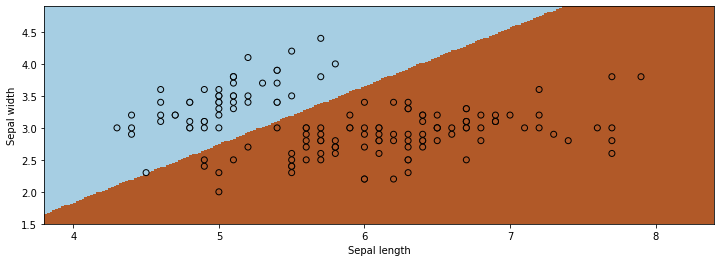

In [16]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0.5] = 0
Z[Z>=0.5] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

This is how we would use the algorithm via `sklearn`.

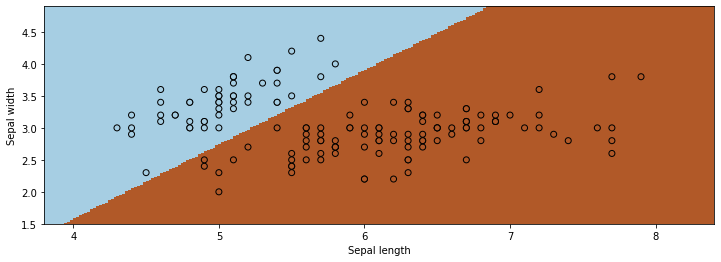

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, fit_intercept=True)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
Y = iris_y2
logreg.fit(X, Y)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Observations About Logistic Regression

* Logistic regression finds a linear decision boundary, is the set of points for which $P(y=1|x)=P(y=0|x)$, or equivalently:
\begin{align*}
0 = \log\frac{P(y=1|x)}{P(y=0|x)}
= \log \frac{\frac{1}{1+\exp(-\theta^\top x)}}{1-\frac{1}{1+\exp(-\theta^\top x)}}
= \theta^\top x
\end{align*}
The claim holds because $0=\theta^\top x$ is a linear function.

* Unlike least squares, we don't have a closed form solution for $\theta$, but we can still apply gradient descent.

# Algorithm: Logistic Regression

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Cross-entropy, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized Bernoulli distribution.

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 5: Multi-Class Classification

Finally, let's look at an extension of logistic regression to an arbitrary number of classes.

# Review: Logistic Regression

Logistic regression fits models of the form:
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

# Multi-Class Classification

Linear regression only applies to binary classification problems. What if we have an arbitrary number of classes $K$?

* The simplest approach that can be used with any machine learning algorithm is the "one vs. all" approach. We train one classifer for each class to distinguish one class from all the others. 

* This works, but loses a valid probabilistic interpretation and is not very elegant.

* Alternatively, we may fit a probabilistic model that outputs multi-class probabilities.

Let's load a fully multiclass version of the Iris dataset.

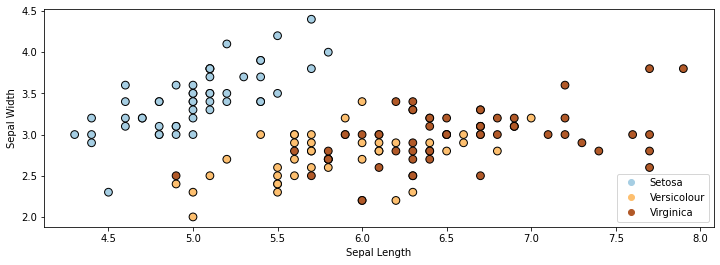

In [18]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# The Softmax Function

The logistic function $\sigma : \mathbb{R} \to [0,1]$ be seen as mapping input an input $\vec z\in\mathbb{R}$ to a probability.

Its multi-class extension $\vec \sigma : \mathbb{R}^K \to [0,1]^K$:  maps a $K$-dimensional input $z\in\mathbb{R}$ to a $K$-dimensional vector of probabilities.

Each componnent of $\vec \sigma(\vec z)$ is defined as
$$ \sigma(\vec z)_k = \frac{\exp(z_k)}{\sum_{l=1}^K \exp(z_l)}. $$
We call this the *softmax* function.

When $K=2$, this looks as follows:
$$ \sigma(\vec z)_1 = \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)}. $$

We can assume that $\exp(z_1) = 1$ because multiplying the numerator and denominator doesn't change any of the probabilities (so we can just divide by $\exp(z_1)$). Thus we obtain:
$$ \sigma(\vec z)_1 = \frac{1}{1 + \exp(z_2)}. $$

This is essentially our sigmoid function. Hence softmax generalizes the sigmoid function.

# The Softmax Model

We can use the softmax function to define a $K$-class classification model.

In the binary classification setting, we mapped weights $\theta$ and features $x$ into a probability as follows:
$$ \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$

In the multi-class setting, we define a model $f : \mathcal{X} \to [0,1]^K$ that outputs the probability of class $k$ based on the features $x$ and class-specific weights $\theta_k$:
$$ \sigma(\theta_k^\top x)_k = \frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}. $$

Its parameter space lies in $\Theta^{K}$, where $\Theta = \mathbb{R}^d$ is the parameter space of logistic regression.


You may have noticed that this model is slightly over-parametrized: multiplying every $\theta_k$ by a constant results in an equivalent model. For this reason, it is often assumed that one of the class weights $\theta_l = 0$.

# Softmax Regression

We again take a probabilistic perspective to derive a $K$-class classification algorithm based on this model.

We will start by using our softmax model to parametrize a probability distribution as follows:
\begin{align*}
p(y=k | x;\theta) & = \vec \sigma(\theta^\top x)_k
\end{align*}

This is called a categorial distribution, and it generalizes the Bernoulli.

Following the principle of maximum likelihood, we want to optimize the following objective defined over a training dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n p(y^{(i)} \mid x^{(i)} ; \theta) = \prod_{i=1}^n \vec \sigma(\theta^\top x^{(i)})_{y^{(i)}}
\end{align*}

This model and objective function define *softmax regression*. (The term "regression" here is again a misnomer.)

Let's now apply softmax regression to the Iris dataset by using the implementation from `sklearn`.

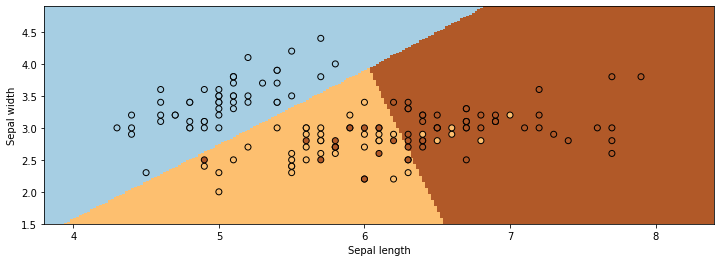

In [19]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

# Create an instance of Softmax and fit the data.
logreg.fit(X, iris_y)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Algorithm: Softmax Regression

* __Type__: Supervised learning (classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Softmax loss, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized categorical distribution.